In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
# find file names start with results
files = [f for f in os.listdir('/gpfs/home/jc10077') if f.startswith('results')]
# sort with the number in the file name like results_#.pkl
files = sorted(files, key=lambda x: int(x.split('_')[1].split('.')[0]))

In [3]:
files[0:21]

['results_979.pkl',
 'results_980.pkl',
 'results_981.pkl',
 'results_982.pkl',
 'results_983.pkl',
 'results_984.pkl',
 'results_985.pkl',
 'results_986.pkl',
 'results_987.pkl',
 'results_988.pkl',
 'results_989.pkl',
 'results_990.pkl',
 'results_991.pkl',
 'results_992.pkl',
 'results_993.pkl',
 'results_994.pkl',
 'results_995.pkl',
 'results_996.pkl',
 'results_997.pkl',
 'results_998.pkl',
 'results_999.pkl']

In [4]:
# read the pickle files
dfs = {}
all_files = files[0:21]
for f in all_files:
    with open(f'/gpfs/home/jc10077/{f}', 'rb') as file:
        df = pickle.load(file)
        dfs[f] = df
#write dfs into a new pickle file
first_num = all_files[0].split('_')[1].split('.')[0]
last_num = all_files[-1].split('_')[1].split('.')[0]
with open(f'/gpfs/home/jc10077/res_{first_num}_{last_num}.pkl', 'wb') as file:
    pickle.dump(dfs, file)

In [5]:
# delete the old pickle files files[0:53]
for f in all_files:
    os.remove(f'/gpfs/home/jc10077/{f}')

In [7]:
resp1 = pd.read_pickle('/gpfs/home/jc10077/res_0_249.pkl')
resp2 = pd.read_pickle('/gpfs/home/jc10077/res_250_409.pkl')
resp3 = pd.read_pickle('/gpfs/home/jc10077/res_450_978.pkl')
resp4 = pd.read_pickle('/gpfs/home/jc10077/res_979_999.pkl')

In [9]:
resp4

{'results_979.pkl': {'true_beta': -0.7382160463897551,
  'estimated_beta': -0.47505603730676005,
  'bootstrap_res': {'quantiles': array([-1.0491579860444145, 0.41215701252187903], dtype=object),
   'mean': -0.4388772224950818,
   'sd': 0.37061144519876515},
  'beta_init': 1.0,
  'lr': 0.001,
  'epochs': 600,
  'B': 500,
  'K_main': 5,
  'n': 5000,
  'binary_A': True,
  'random_state': 979},
 'results_980.pkl': {'true_beta': -0.32215824242451996,
  'estimated_beta': -0.43276147544386967,
  'bootstrap_res': {'quantiles': array([-0.87144068,  0.37713208]),
   'mean': -0.40092519679835137,
   'sd': 0.3130203310546778},
  'beta_init': 1.0,
  'lr': 0.001,
  'epochs': 600,
  'B': 500,
  'K_main': 5,
  'n': 5000,
  'binary_A': True,
  'random_state': 980},
 'results_981.pkl': {'true_beta': 0.1351667456580321,
  'estimated_beta': 0.35620128890093505,
  'bootstrap_res': {'quantiles': array([-0.19489978328317517, 1.3610497295855803], dtype=object),
   'mean': 0.41317101613725743,
   'sd': 0.39470

In [10]:
true_beta = []
estimated_beta = []
boot_interval_low = []
boot_interval_high = []
boot_mean = []
boot_sd = []
boot_num = []
beta_init = []
lr = []
epoches = []
cv_folds = []
num_points = []
binary_treatment = []
random_state = []
    
for data in [resp1, resp2, resp3, resp4]:
    for key in data.keys():
        sim_res = data[key]
        true_beta.append(sim_res['true_beta'])
        estimated_beta.append(sim_res['estimated_beta'])
        boot_interval_low.append(sim_res['bootstrap_res']['quantiles'][0])
        boot_interval_high.append(sim_res['bootstrap_res']['quantiles'][1])
        boot_mean.append(sim_res['bootstrap_res']['mean'])
        boot_sd.append(sim_res['bootstrap_res']['sd'])
        boot_num.append(sim_res['B'])
        beta_init.append(sim_res['beta_init'])
        lr.append(sim_res['lr'])
        epoches.append(sim_res['epochs'])
        cv_folds.append(sim_res['K_main'])
        num_points.append(sim_res['n'])
        binary_treatment.append(sim_res['binary_A'])
        random_state.append(sim_res['random_state'])

all_sim_df = pd.DataFrame(
    {'true_beta': true_beta,
     'estimated_beta': estimated_beta,
     'boot_interval_low': boot_interval_low,
     'boot_interval_high': boot_interval_high,
     'boot_mean': boot_mean,
     'boot_sd': boot_sd,
     'boot_num': boot_num,
     'beta_init': beta_init,
     'lr': lr,
     'epoches': epoches,
     'cv_folds': cv_folds,
     'num_points': num_points,
     'binary_treatment': binary_treatment,
     'random_state': random_state
    })      

In [11]:
all_sim_df

,true_beta,estimated_beta,boot_interval_low,boot_interval_high,boot_mean,boot_sd,boot_num,beta_init,lr,epoches,cv_folds,num_points,binary_treatment,random_state
0,0.195254,-0.062454,-0.407203,0.581778,-0.023627,0.249137,500,1.0,0.001,600,5,5000,True,0
1,-0.331912,-0.261632,-0.822350,0.651314,-0.215140,0.392791,500,1.0,0.001,600,5,5000,True,1
2,-0.256020,-0.531340,-0.907597,0.052332,-0.510995,0.244964,500,1.0,0.001,600,5,5000,True,2
3,0.203192,0.207787,-0.275107,0.916114,0.244303,0.325941,500,1.0,0.001,600,5,5000,True,3
4,1.868119,1.713218,1.115844,3.311436,1.817467,0.536568,500,1.0,0.001,600,5,5000,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,-0.550781,-0.663833,-1.088438,-0.088711,-0.633168,0.254182,500,1.0,0.001,600,5,5000,True,995
956,-1.208948,-1.031307,-1.679741,0.299567,-0.917968,0.534080,500,1.0,0.001,600,5,5000,True,996
957,-0.217583,-0.568267,-0.899088,-0.058640,-0.550524,0.207005,500,1.0,0.001,600,5,5000,True,997
958,1.826250,1.042175,0.564017,1.864133,1.079038,0.333940,500,1.0,0.001,600,5,5000,True,998


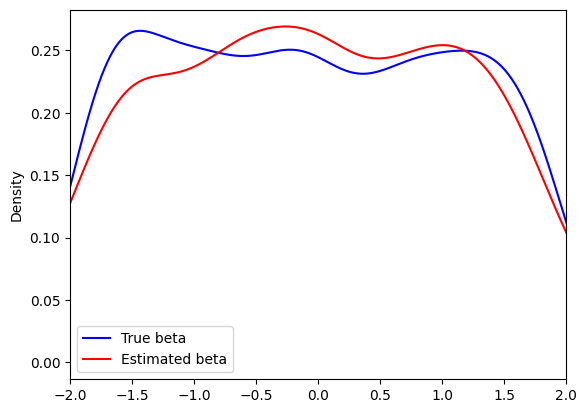

In [20]:
# plot distribution of true_beta and estimated_beta, with boot_interval_low and boot_interval_high as shaded area
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
all_sim_df['true_beta'].plot(kind='kde', ax=ax, label='True beta', color='blue')
all_sim_df['estimated_beta'].plot(kind='kde', ax=ax, label='Estimated beta', color='red')
# limit the x-axis to the range of -2,2
plt.xlim(-2, 2)
plt.legend()
plt.show()
plt.close()


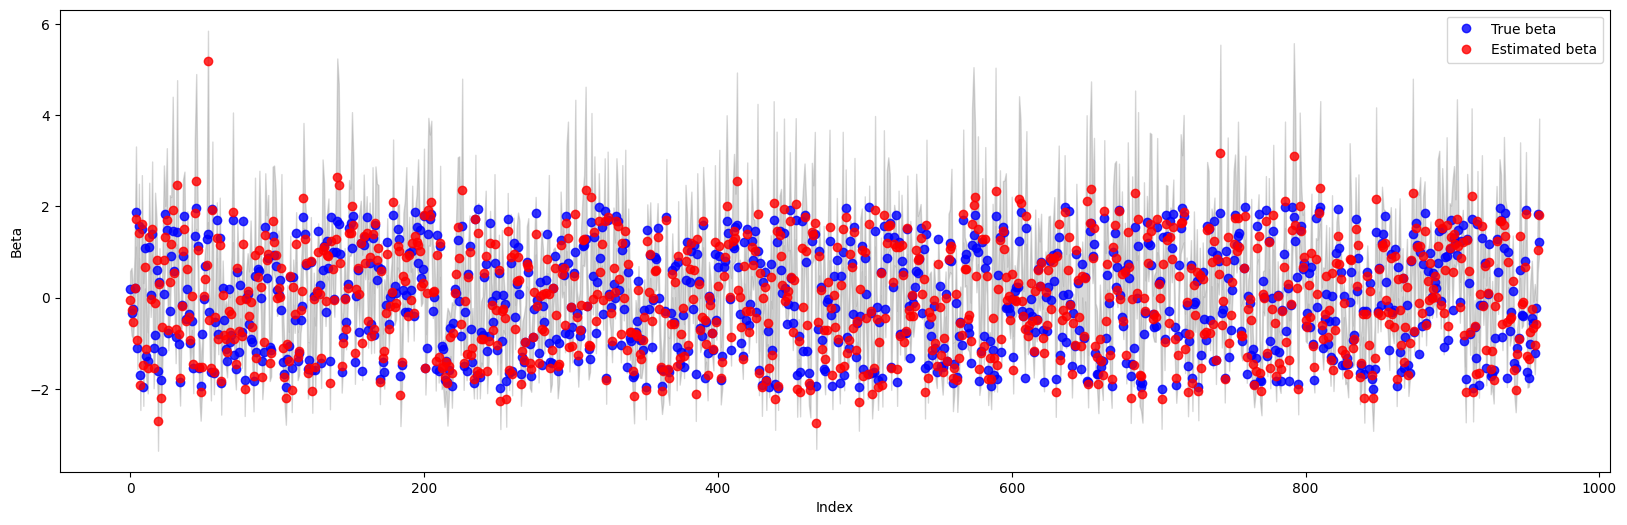

In [29]:
# plot the true_beta to the index, just show the points, not the line, make this a big plot
fig, ax = plt.subplots(figsize=(20, 6))


all_sim_df['true_beta'].plot(ax=ax, style='o', label='True beta', color='blue', alpha=0.8)
all_sim_df['estimated_beta'].plot(ax=ax, style='o', label='Estimated beta', color='red', alpha=0.8)

# plot the boot_interval_low and boot_interval_high as shaded area, a curve above and a curve below, gray filled between the curves
ax.fill_between(all_sim_df.index, all_sim_df['boot_interval_low'], all_sim_df['boot_interval_high'], color='gray', alpha=0.3)

ax.set_xlabel('Index')
ax.set_ylabel('Beta')
plt.legend()
plt.show()
plt.close()

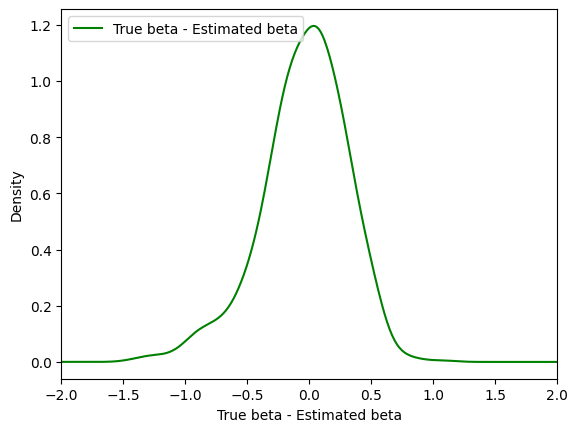

In [32]:
# plot distribution of true_beta minus estimated_beta
fig, ax = plt.subplots()
(all_sim_df['true_beta'] - all_sim_df['estimated_beta']).plot(kind='kde', ax=ax, label='True beta - Estimated beta', color='green')
ax.set_xlabel('True beta - Estimated beta')
ax.set_xlim(-2, 2)
plt.legend()
plt.show()
plt.close()

In [22]:
usrds = pd.read_csv('/gpfs/data/wulab/data/USRDS/USRDS_2020_inpatient.csv')

In [36]:
usrds['PROVUSRD'].value_counts()

PROVUSRD
186.0      3301
6627.0     2761
2632.0     2153
1333.0     2137
1986.0     2054
           ... 
46190.0       1
69042.0       1
45439.0       1
38381.0       1
35433.0       1
Name: count, Length: 5669, dtype: int64

In [33]:
usrds_part = usrds[usrds['PROVUSRD'].isin([186, 6627, 2632])]
usrds_part.reset_index(drop=True, inplace=True)
usrds_part['186A'] = (usrds_part['PROVUSRD'] == 186).astype(int)
usrds_part['6627A'] = (usrds_part['PROVUSRD'] == 6627).astype(int)
usrds_part = usrds_part[0:8200]

/tmp/ipykernel_3463271/4158327866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usrds_part['186A'] = (usrds_part['PROVUSRD'] == 186).astype(int)
/tmp/ipykernel_3463271/4158327866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usrds_part['6627A'] = (usrds_part['PROVUSRD'] == 6627).astype(int)


In [34]:
usrds_part

,PROVUSRD,STATE,readmit30,black,asian,nhpi,other,white,female,dem_hispanic,...,covid,comor_heartfailure,comor_cad,comor_cva,comor_pvd,comor_ca,comor_copd,CLM_THRU,186A,6627A
0,6627.0,48,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18376.0,0,1
1,6627.0,48,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18537.0,0,1
2,186.0,12,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18459.0,1,0
3,186.0,12,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18564.0,1,0
4,186.0,12,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18582.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8195,6627.0,12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18360.0,0,1
8196,6627.0,12,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18421.0,0,1
8197,6627.0,12,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18576.0,0,1
8198,6627.0,12,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18605.0,0,1


In [35]:
non_covariates = ['PROVUSRD', 'other', 'agegt74', 'bmi_gt30', 'other_employment', 'los_gt9', 'vintage_gt5y', 'oth_dialysis', 'CLM_THRU']
outcome_col = 'readmit30'
A_186 = '186A'
A_6627 = '6627A'

In [25]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
# reload dml_utils so I don't have to restart the kernel every time I make a change
%load_ext autoreload
%autoreload 2

from dml_utils.dgp import GD
from dml_utils.dml import DML, Estimate, Bootstrap
from dml_utils import dgp, dml
import numpy as np
import pandas as pd
import time
import pickle

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using device: cuda


In [36]:
# covar is columns not in non_covariates
covar_tensor = torch.tensor(usrds_part.drop(columns=non_covariates + [outcome_col] + [A_186] + [A_6627]).values, dtype=torch.float32).to(device)
A_186_tensor = torch.tensor(usrds_part[A_186].values, dtype=torch.float32).to(device)
A_6627_tensor = torch.tensor(usrds_part[A_6627].values, dtype=torch.float32).to(device)
outcome_tensor = torch.tensor(usrds_part[outcome_col].values, dtype=torch.float32).to(device)

# Real data run

In [27]:
def run_dml_pipeline(beta, n=5000, p=20, Sigma=None, K_main=5, K_inner=5, B=500, binary_A=True, device='cuda',
                    beta_init=1.0, lr=1e-3, epochs=600, random_state=42, linear=False,
                    early_stopping_patience=50, early_stopping_delta=1e-4, 
                    early_stopping_verbose=False, use_linear_models=False, simulation = True,
                    X=None, Y=None, A=None):
    """
    Run the complete DML pipeline: Data Generation, Nuisance Parameter Estimation, and Causal Estimation.

    Parameters:
    - beta (float): Coefficient for A in the outcome model.
    - n (int): Number of samples.
    - p (int): Number of covariates/features.
    - Sigma (torch.Tensor or None): Covariance matrix of X.
    - K_main (int): Number of main folds for cross-fitting.
    - K_inner (int): Number of inner folds for Wp cross-fitting.
    - binary_A (bool): If True, treat A as binary.
    - device (str): Device to use ('cuda' or 'cpu').
    - beta_init (float): Initial guess for beta0.
    - lr (float): Learning rate for beta estimation.
    - epochs (int): Number of epochs for beta estimation.
    - random_state (int or None): Seed for reproducibility.
    - early_stopping_patience (int): Patience for Early Stopping.
    - early_stopping_delta (float): Minimum improvement for Early Stopping.
    - early_stopping_verbose (bool): Verbosity for Early Stopping.
    - use_linear_models (bool): If True, use linear models for nuisance parameters.

    Returns:
    - beta_estimated (float): Estimated causal parameter beta0.
    """
    # Generate Data
    if simulation:
        print(f"Generating synthetic data with seed {random_state}...")
        X, Y, A = GD(beta=beta, n=n, p=p, Sigma=Sigma, binary_A=binary_A, random_state=random_state, linear=linear)
    else:
        X = X.to(device)
        Y = Y.to(device)
        A = A.to(device)
    # Estimate nuisance parameters with nested K-fold cross-fitting
    print(f"\nEstimating nuisance parameters with nested K-fold cross-fitting for {random_state}...")
    dml_results = DML(Y, A, X, K=K_main, binary_A=binary_A, device=device, epoches=epochs,
                     early_stopping_patience=early_stopping_patience, 
                     early_stopping_delta=early_stopping_delta, 
                     early_stopping_verbose=early_stopping_verbose)

    # Estimate Causal Parameter
    print(f"\nEstimating causal parameter beta0 for {random_state}...")
    beta_estimated = Estimate(Y, A, dml_results, beta_init=beta_init, 
                              lr=lr, epochs=epochs, device=device, real_data=(not simulation))
    if simulation:
        print(f"\nTrue beta: {beta}, Estimated beta: {beta_estimated:.4f} for {random_state}")
        print(f"\nRunning bootstrap for {random_state}...")
    bootstrap_res = Bootstrap(Y, A, dml_results, B=B, real_data=(not simulation))
    
    if simulation:
        res = {'true_beta': beta, 'estimated_beta': beta_estimated, 'bootstrap_res': bootstrap_res, 'beta_init': beta_init, 'lr': lr, 'epochs': epochs, 'B': B, 'K_main': K_main, 'n': n, 'binary_A': binary_A, 'random_state': random_state}
    else:
        res = {'estimated_beta': beta_estimated, 'bootstrap_res': bootstrap_res, 'beta_init': beta_init, 'lr': lr, 'epochs': epochs, 'B': B, 'K_main': K_main, 'n': n, 'binary_A': binary_A}
    with open(f'results_{random_state}.pkl', 'wb') as f:
        pickle.dump(res, f)
    print(f"Results saved to results_{random_state}.pkl")
    return None

In [ ]:
# run 186 with more 0s from another group
run_dml_pipeline(beta=0, n=0, p=0, K_main=5, K_inner=5, B=500, binary_A=True, device=device,
                    beta_init=1.0, lr=1e-3, epochs=2048, random_state=1861, simulation = False,
                    X=covar_tensor, Y=outcome_tensor, A=A_186_tensor)


Estimating nuisance parameters with nested K-fold cross-fitting for 1861...


In [28]:
run_dml_pipeline(beta=0, n=0, p=0, K_main=5, K_inner=5, B=500, binary_A=True, device=device,
                    beta_init=1.0, lr=1e-3, epochs=2048, random_state=186, simulation = False,
                    X=covar_tensor, Y=outcome_tensor, A=A_186_tensor)
run_dml_pipeline(beta=0, n=0, p=0, K_main=5, K_inner=5, B=500, binary_A=True, device=device,    
                    beta_init=1.0, lr=1e-3, epochs=2048, random_state=6627, simulation = False,
                    X=covar_tensor, Y=outcome_tensor, A=A_6627_tensor)


Estimating nuisance parameters with nested K-fold cross-fitting for 186...

Estimating causal parameter beta0 for 186...
Results saved to results_186.pkl

Estimating nuisance parameters with nested K-fold cross-fitting for 6627...

Estimating causal parameter beta0 for 6627...
Results saved to results_6627.pkl


In [30]:
res_410 = pd.read_pickle('results_186.pkl')
res_410

{'estimated_beta': 0.8250438272950449,
 'bootstrap_res': {'quantiles': array([0.41311419, 1.33641935]),
  'mean': 0.8544693020916868,
  'sd': 0.254538983563157},
 'beta_init': 1.0,
 'lr': 0.001,
 'epochs': 2048,
 'B': 500,
 'K_main': 5,
 'n': 0,
 'binary_A': True}

In [2]:
res_410 = pd.read_pickle('results_1861.pkl')
res_410

{'estimated_beta': 0.31717632711058924,
 'bootstrap_res': {'quantiles': array([-0.00154735,  0.70457969]),
  'mean': 0.33152933994635636,
  'sd': 0.17113630821870446},
 'beta_init': 1.0,
 'lr': 0.001,
 'epochs': 2048,
 'B': 500,
 'K_main': 5,
 'n': 0,
 'binary_A': True}

In [31]:
res_410 = pd.read_pickle('results_6627.pkl')
res_410


{'estimated_beta': -0.2559142261750983,
 'bootstrap_res': {'quantiles': array([-0.70716382,  0.18535719]),
  'mean': -0.2636485663571345,
  'sd': 0.23529317768052735},
 'beta_init': 1.0,
 'lr': 0.001,
 'epochs': 2048,
 'B': 500,
 'K_main': 5,
 'n': 0,
 'binary_A': True}

In [52]:
A

tensor([ 0.4721, -0.3365,  0.0119,  1.1739,  0.2577,  0.1631,  0.3476,  0.5964,
         0.6320, -0.3379,  0.6713, -0.7935,  1.0106, -2.1503,  0.9809,  0.5788,
        -0.5831,  1.1464,  0.9148, -0.9244, -0.9880,  0.0765, -0.2936, -0.3227,
         1.0544, -0.4587, -0.9124, -1.2233,  1.9842,  1.1003, -0.1507,  0.6078,
        -0.4536,  0.5261, -1.2498, -0.2655,  0.3611,  0.1532,  0.1262,  0.4756,
         1.5868,  0.1389, -0.0243, -0.9663, -0.0850, -0.5939,  0.4239,  0.1040,
        -0.1868, -1.7845,  1.0555, -0.0748,  1.6062, -1.0192,  1.9563, -0.0566,
         0.4289,  0.4828,  1.2408,  0.5290, -0.0491,  1.8215,  1.5951,  0.8725,
         1.6260,  0.6681,  1.1009,  0.0397, -0.1456,  0.4088, -0.3236,  2.0424,
         0.7576, -0.8151, -1.3569, -0.7486,  0.2287, -0.0368, -0.0821,  1.7153,
         0.6224,  0.0291, -0.5450,  1.4029,  2.2503, -0.7106,  0.1465,  0.5453,
        -1.0157,  0.4582,  0.4493, -1.3142, -0.0334,  0.4865, -0.9952,  2.3809,
         1.0346,  1.7719,  2.5059, -0.71

In [25]:
usrds.columns

Index(['PROVUSRD', 'STATE', 'readmit30', 'black', 'asian', 'nhpi', 'other',
       'white', 'female', 'dem_hispanic', 'age18_34', 'age35_49', 'age50_64',
       'age65_74', 'agegt74', 'bmi_lt18.5', 'bmi_18.5_25', 'bmi_25_30',
       'bmi_gt30', 'unemployed', 'employed', 'retired', 'other_employment',
       'comor_drug', 'comor_alcho', 'comor_tobac', 'los_lt3', 'los_3_5',
       'los_6_9', 'los_gt9', 'vintage_lt90d', 'vintage_90d_182d',
       'vintage_182d_1y', 'vintage_1y_2y', 'vintage_2y_3y', 'vintage_3y_5y',
       'vintage_gt5y', 'lim_functional', 'cause_esrd_diab', 'cause_esrd_htn',
       'cause_esrd_gn', 'cause_esrd_oth', 'hemodialysis', 'CAPD_dialysis',
       'CCPD_dialysis', 'oth_dialysis', 'covid', 'comor_heartfailure',
       'comor_cad', 'comor_cva', 'comor_pvd', 'comor_ca', 'comor_copd',
       'CLM_THRU'],
      dtype='object')